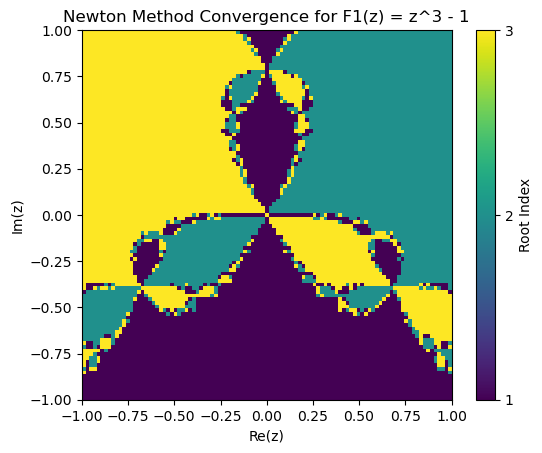

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Funktion F1 in R^2
def F1(x):
    z = x[0] + 1j * x[1]
    f = z**3 - 1
    return np.array([f.real, f.imag])

# Jacobimatrix von F1
def jacobian_F1(x):
    z = x[0] + 1j * x[1]
    df_dz = 3 * z**2
    return np.array([[df_dz.real, -df_dz.imag], 
                     [df_dz.imag, df_dz.real]])

# Newton-Raphson-Verfahren
def newton_method(F, jacobian, x0, tol=1e-8, max_iter=100):
    x = x0
    for _ in range(max_iter):
        J = jacobian(x)
        F_val = F(x)
        delta_x = np.linalg.solve(J, -F_val)
        x_next = x + delta_x
        
        if np.linalg.norm(x_next - x, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tol:
            break
        
        x = x_next
    return x

# Testen des Verfahrens für alle Startwerte in Q
def test_newton_in_grid(N):
    roots = np.array([
        [1, 0],
        [-0.5, np.sqrt(3) / 2],
        [-0.5, -np.sqrt(3) / 2]
    ])
    tolerance = 1e-3
    grid_points = np.linspace(-1, 1, N+1)
    A = np.zeros((N+1, N+1))
    
    for i, real in enumerate(grid_points):
        for j, imag in enumerate(grid_points):
            x0 = np.array([real, imag]) + 1e-6 * np.random.rand(2)
            x_star = newton_method(F1, jacobian_F1, x0)
            
            distances = np.linalg.norm(roots - x_star, axis=1)
            A[i, j] = np.argmin(distances) + 1
    
    return A

# Visualisierung
def visualize_matrix(A):
    plt.imshow(A, cmap='viridis', extent=(-1, 1, -1, 1))
    plt.colorbar(ticks=[1, 2, 3], label='Root Index')
    plt.title('Newton Method Convergence for F1(z) = z^3 - 1')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

# Hauptprogramm
N = 100  # Auflösung des Gitters
A = test_newton_in_grid(N)
visualize_matrix(A)
